<a href="https://colab.research.google.com/github/Srivatsav515/Tesla_stock_analysis/blob/main/Tesla_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
        Date     Close      High       Low      Open     Volume
0 2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1 2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2 2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3 2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4 2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3802 entries, 0 to 3801
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3802 non-null   datetime64[ns]
 1   Close   3802 non-null   float64       
 2   High    3802 non-null   float64       
 3   Low     3802 non-null   float64       
 4   Open    3802 non-null   float64       
 5   Volume  3802 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 178.3 KB
None

Missing Values:
Date      0
Close     0
High      0


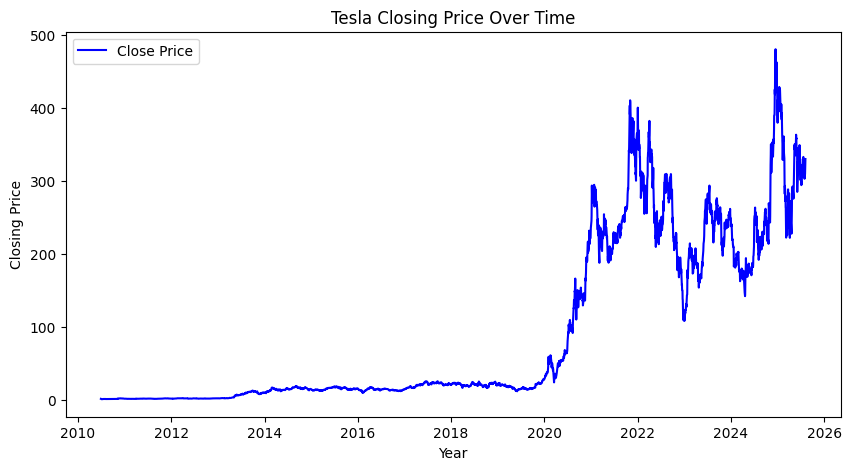

Insight: The closing price of Tesla was very low in the early years (2010),
and it shows a strong upward trend over time, especially after 2019.


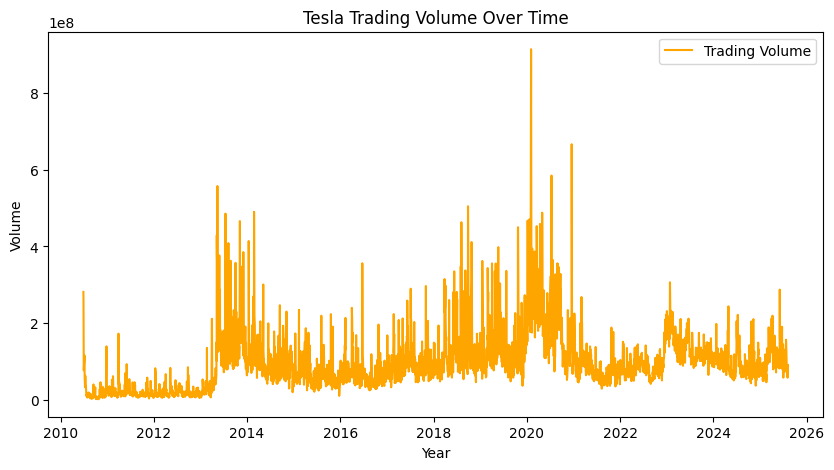

Insight: Tesla’s trading volume had huge spikes during certain years,
indicating high investor interest, especially around 2020–2021.


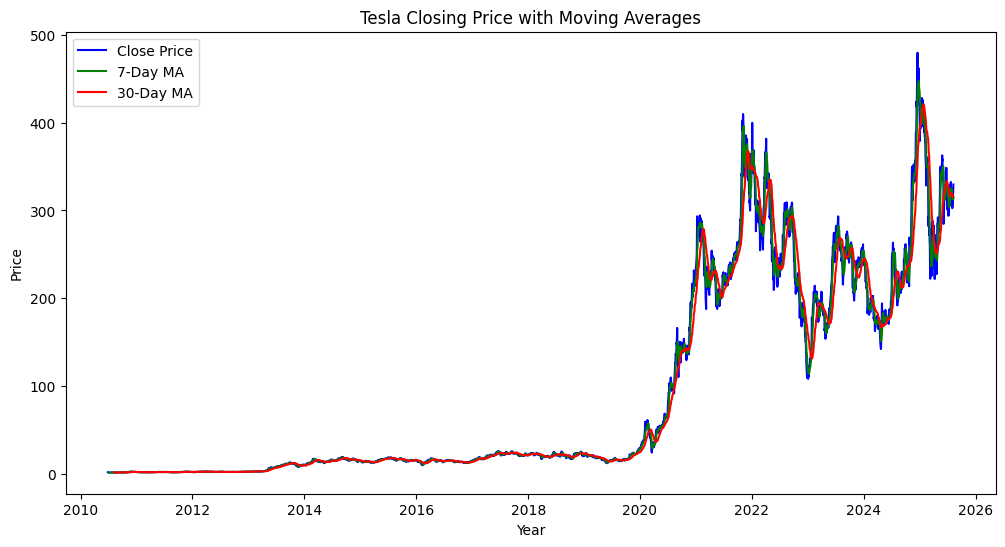

Insight: The moving averages smooth out short-term ups and downs.
When the 7-day line is above the 30-day line, it shows upward momentum.
When the 7-day line falls below, it shows downward momentum.

Yearly Average Closing Price:
Year
2010      1.556123
2011      1.786984
2012      2.077907
2013      6.960082
2014     14.888606
2015     15.336193
2016     13.984484
2017     20.954420
2018     21.153995
2019     18.235347
2020     96.665689
2021    259.998162
2022    263.093081
2023    217.475240
2024    230.614961
2025    316.647266
Name: Close, dtype: float64


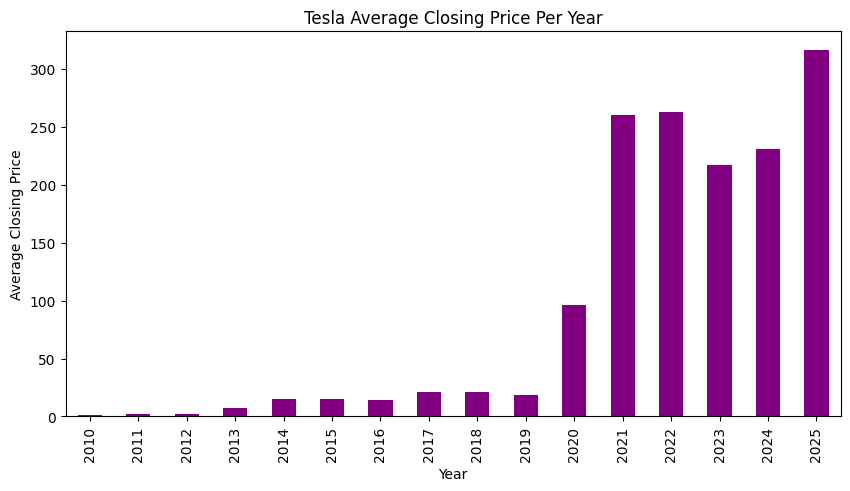

Insight: Tesla’s average closing price was below $5 for many years,
but started rising sharply after 2019, showing huge growth in value.

Highest Trading Volume Per Year:
Year
2010    281494500
2011    172767000
2012     85206000
2013    557458500
2014    490225500
2015    234744000
2016    356136000
2017    296871000
2018    504745500
2019    450091500
2020    914082000
2021    268189500
2022    221923300
2023    306590600
2024    243869700
2025    287499800
Name: Volume, dtype: int64


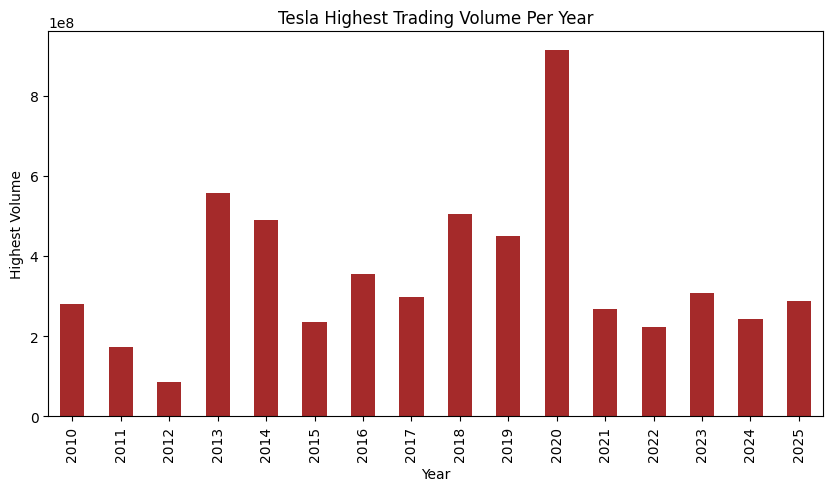

Insight: Trading activity was highest during 2020–2021,
likely due to stock splits, market hype, and strong investor interest.

Correlation Matrix:
            Open      High       Low     Close    Volume
Open    1.000000  0.999680  0.999599  0.999164  0.090528
High    0.999680  1.000000  0.999591  0.999632  0.094419
Low     0.999599  0.999591  1.000000  0.999663  0.087184
Close   0.999164  0.999632  0.999663  1.000000  0.091577
Volume  0.090528  0.094419  0.087184  0.091577  1.000000

Insight: Open, High, Low, and Close prices are strongly correlated
because they move together in stock trading.
Volume has a weaker correlation, meaning price can go up or down
even if volume is high or low.


In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
data = pd.read_csv("/content/Tesla_stock_data.csv")

# Step 3: Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Step 4: Basic information
print("First 5 rows:")
print(data.head())
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())
print("\nBasic Statistics:")
print(data.describe())
print("\nInsight: The dataset contains", data.shape[0],
      "rows from", data['Date'].min(), "to", data['Date'].max())

# Step 5: Plot Closing Price trend
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title("Tesla Closing Price Over Time")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

print("Insight: The closing price of Tesla was very low in the early years (2010),")
print("and it shows a strong upward trend over time, especially after 2019.")

# Step 6: Plot Volume trend
plt.figure(figsize=(10,5))
plt.plot(data['Date'], data['Volume'], label='Trading Volume', color='orange')
plt.title("Tesla Trading Volume Over Time")
plt.xlabel("Year")
plt.ylabel("Volume")
plt.legend()
plt.show()

print("Insight: Tesla’s trading volume had huge spikes during certain years,")
print("indicating high investor interest, especially around 2020–2021.")

# Step 7: Calculate Moving Averages (7-day and 30-day)
data['MA7'] = data['Close'].rolling(7).mean()
data['MA30'] = data['Close'].rolling(30).mean()

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA7'], label='7-Day MA', color='green')
plt.plot(data['Date'], data['MA30'], label='30-Day MA', color='red')
plt.title("Tesla Closing Price with Moving Averages")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()

print("Insight: The moving averages smooth out short-term ups and downs.")
print("When the 7-day line is above the 30-day line, it shows upward momentum.")
print("When the 7-day line falls below, it shows downward momentum.")

# Step 8: Yearly Average Close Price
data['Year'] = data['Date'].dt.year
yearly_avg = data.groupby('Year')['Close'].mean()
print("\nYearly Average Closing Price:")
print(yearly_avg)

yearly_avg.plot(kind='bar', figsize=(10,5), color='purple')
plt.title("Tesla Average Closing Price Per Year")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.show()

print("Insight: Tesla’s average closing price was below $5 for many years,")
print("but started rising sharply after 2019, showing huge growth in value.")

# Step 9: Highest Trading Volume per Year
yearly_volume = data.groupby('Year')['Volume'].max()
print("\nHighest Trading Volume Per Year:")
print(yearly_volume)

yearly_volume.plot(kind='bar', figsize=(10,5), color='brown')
plt.title("Tesla Highest Trading Volume Per Year")
plt.xlabel("Year")
plt.ylabel("Highest Volume")
plt.show()

print("Insight: Trading activity was highest during 2020–2021,")
print("likely due to stock splits, market hype, and strong investor interest.")

# Step 10: Correlation between columns
print("\nCorrelation Matrix:")
print(data[['Open','High','Low','Close','Volume']].corr())

print("\nInsight: Open, High, Low, and Close prices are strongly correlated")
print("because they move together in stock trading.")
print("Volume has a weaker correlation, meaning price can go up or down")
print("even if volume is high or low.")
